<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/MLA1_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1
Jacob Vallery<br>CS430-ON <br>Machine Learning in the Cloud

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(4) Reading the file from moodle into a dataset named “df” from my Google Drive.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

(5) The first five rows of the dataset, the last five rows of the dataset and a sample of five random rows from the dataset.

The first five rows:

In [ ]:
df.head(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


The last five rows:

In [ ]:
df.tail(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


A sample of five random rows:

In [ ]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
310,1/13/2012 22:00,-5.5,-10.1,70,32,12.9,99.28,Snow
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear
7265,10/29/2012 17:00,14.2,9.4,73,48,24.1,99.94,Cloudy
3448,5/23/2012 16:00,21.5,12.2,55,6,24.1,101.13,Mainly Clear
5306,8/9/2012 2:00,22.4,16.7,70,4,25.0,100.91,Cloudy


(6) The code to display a list of all of the columns in the dataset.

In [ ]:
columns = df.columns.tolist()
print(columns)

['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather']


(7) Renaming these columns.

In [ ]:
df.rename(columns={'Date/Time': 'date_time'}, inplace=True)
df.rename(columns={'Temp (C)': 'temp_c'}, inplace=True)
df.rename(columns={'Dew Point Temp (C)': 'dew_point'}, inplace=True)
df.rename(columns={'Rel Hum (%)': 'relative_humidity'}, inplace=True)
df.rename(columns={'Wind Spd (km/h)': 'wind_speed'}, inplace=True)
df.rename(columns={'Visibility (km)': 'visibility'}, inplace=True)
df.rename(columns={'Stn Press (kPa)': 'pressure'}, inplace=True)
df.rename(columns={'Weather': 'weather'}, inplace=True)

Verifying the change.

In [ ]:
columns = df.columns.tolist()
print(columns)

['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']


(8) Finding standard statistics.

In [ ]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


(9) Adding temp_f column.

In [ ]:
df['temp_f'] = df['temp_c'] * 9/5 + 32

Verifying the change.

In [ ]:
df.head(2)

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76


(10) Moving temp_f so that it appears immediately before temp_c.

In [ ]:
columns = list(df.columns)
temp_f_index = columns.index('temp_f')
temp_c_index = columns.index('temp_c')

columns.insert(temp_c_index, columns.pop(temp_f_index))

df = df[columns]

Verifying the change.

In [ ]:
df.head(2)

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog


(11) The code to display the data types of all the columns in the dataset.


In [ ]:
print(df.dtypes)

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


(12) The code to convert this column to a date/time column and to verify the conversion was successful.

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
print(df.dtypes)

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object


(13) The code to get the average temperature (in F) for each month and written into an object called monthly_avg.

In [ ]:
monthly_avg = pd.Series(df.groupby(df['date_time'].dt.month)['temp_f'].mean())
print(monthly_avg)

date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


(14) The code to generate a scatterplot that compares the temperature against the relative humidity.

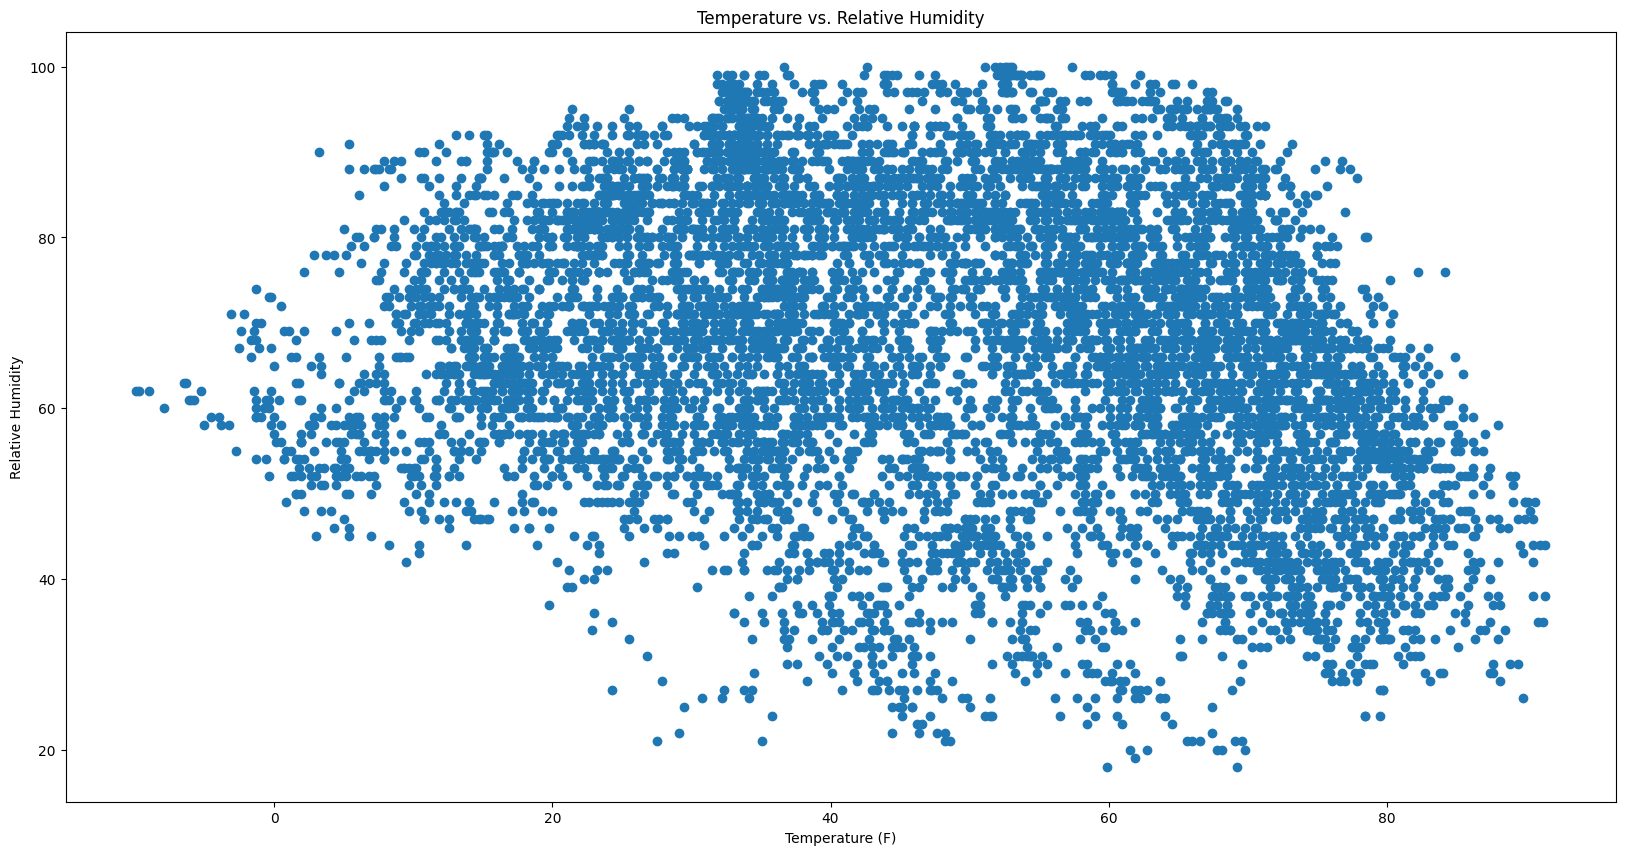

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['temp_f'], df['relative_humidity'])
plt.xlabel('Temperature (F)')
plt.ylabel('Relative Humidity')
plt.title('Temperature vs. Relative Humidity')
plt.show()

(15) The code to generate a line chart that shows the average temperature per month.

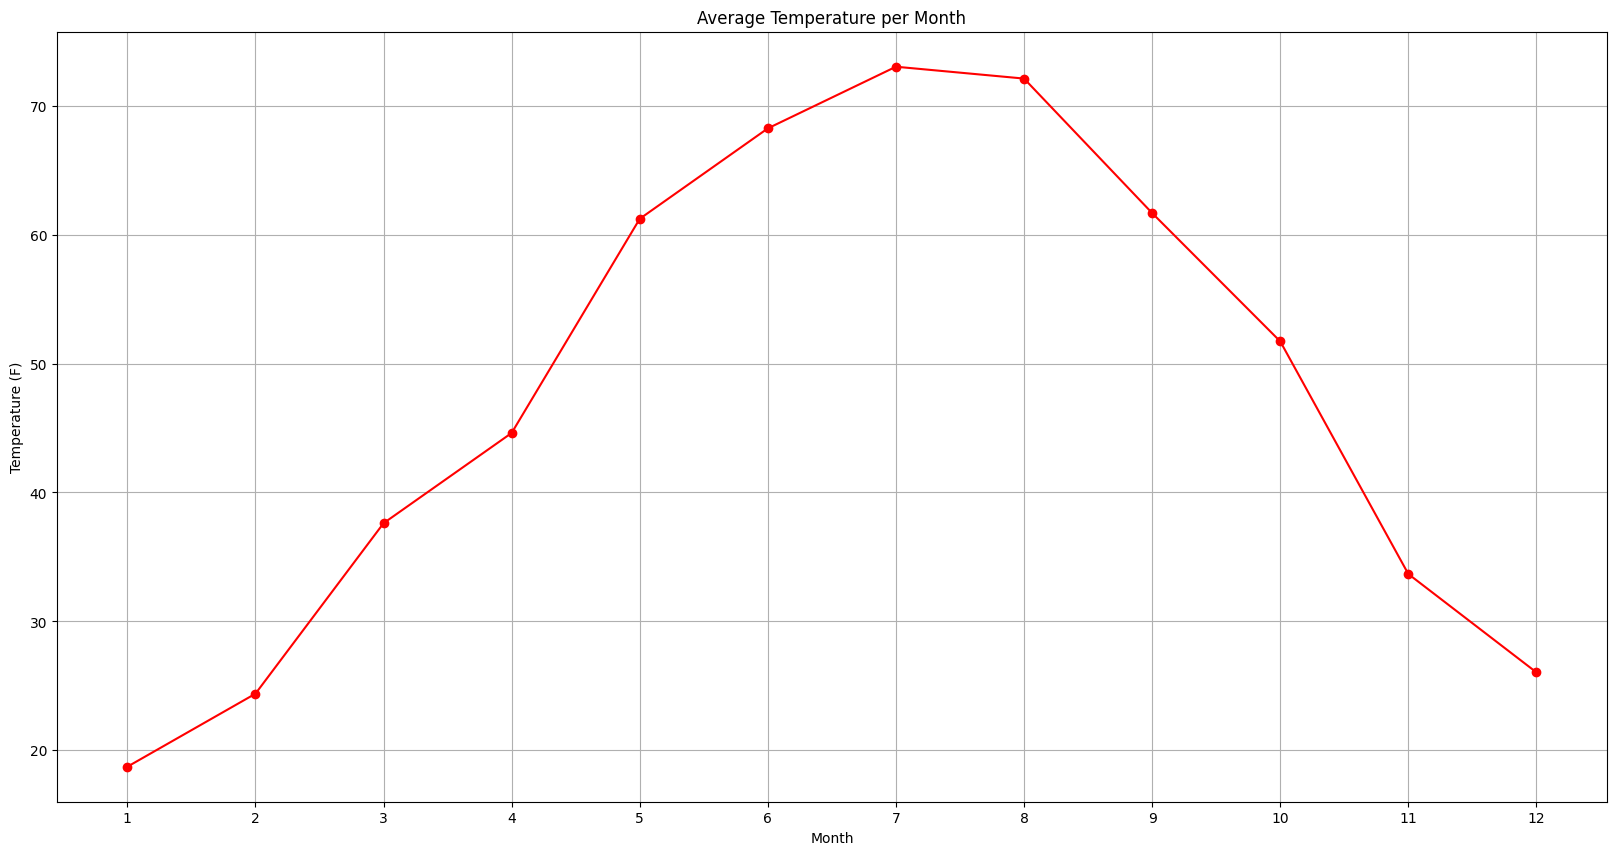

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature per Month')
plt.grid(True)
plt.show()

(16) The code to generate a box plot.

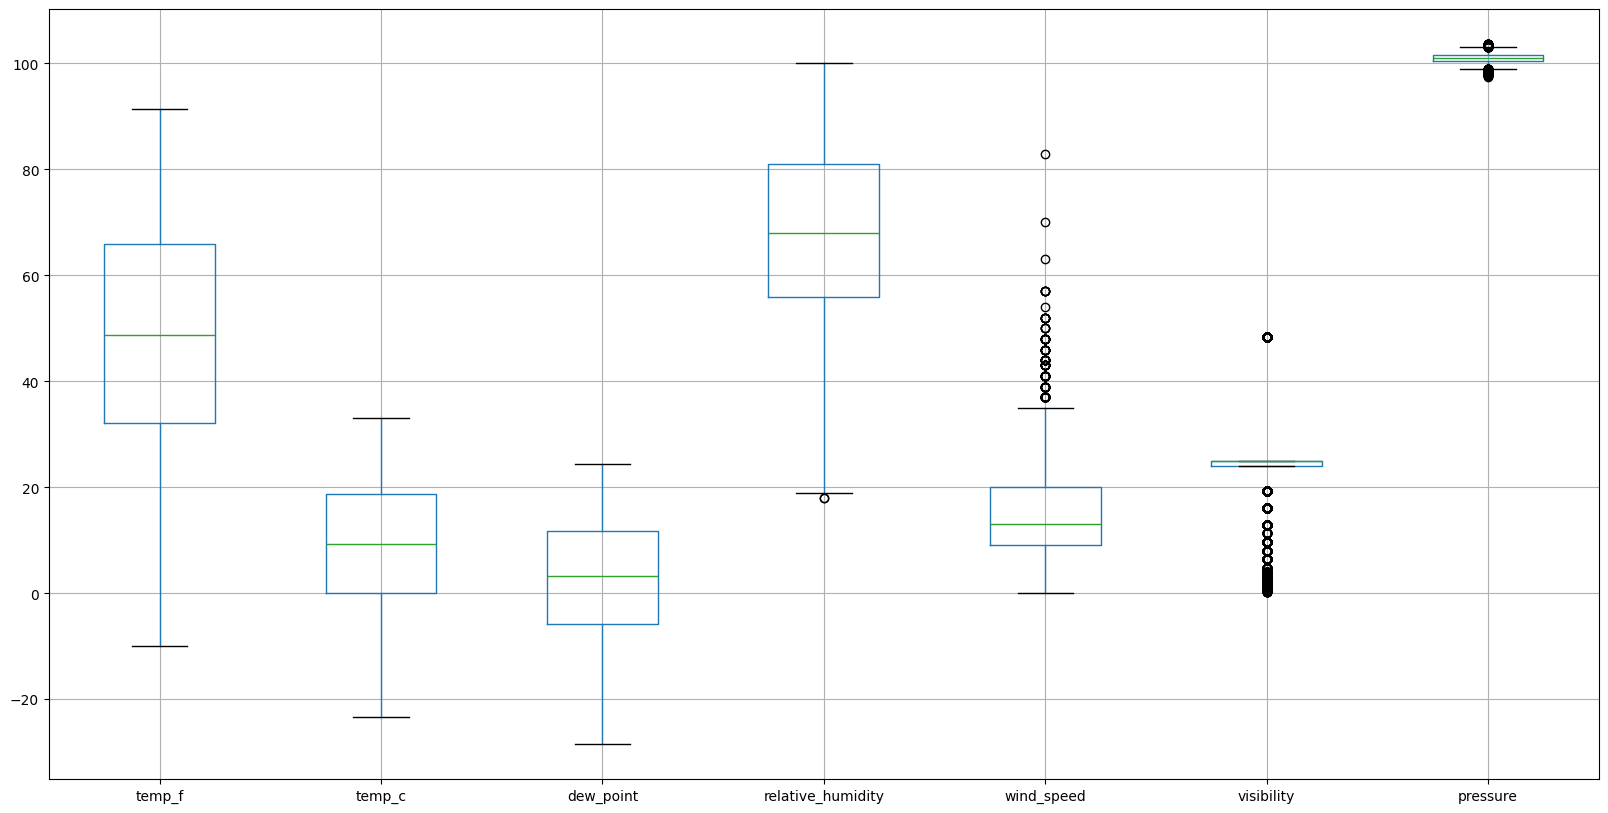

In [ ]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.show()